# Clasificador Clasico

Se va a mostrar como construir un clasificador, las librerias utilizadas serán de `PennyLane` ya que, posteriormente se ocntruirá un clasificador cuántico. 

Tras la construcción de unos datos, diseñamos un modelo tipo `arctan`, que inicializaremos con una recta divisoria del plano y, tras haber definido la funcion de coste `average_loss`, diseñamos un gradiente a través de la derivada de la función `arctan` que regulará los pesos del modelo. Por último, incializamos el proceso de automatización, mostrando al final las correcciones que el modelo ha ido haciendo para una ejemplificación más ilustrativa.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

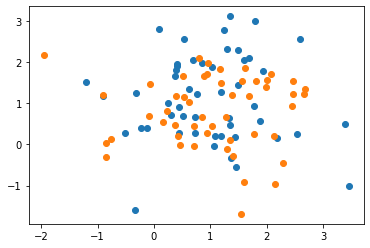

In [21]:
# Creamos unas distribuciones de puntos que haran de datos

n_samples = 100
A = np.array([[np.random.normal(loc = 1), np.random.normal(loc = 1)] for i in range(n_samples//2)])
B = np.array([[np.random.normal(loc = 1), np.random.normal(loc = 1)] for i in range(n_samples//2)])

plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1])
plt.show()

In [22]:
# Asignamos atributos
feature = np.concatenate([A,B], axis = 0)

# Asignamos valor
label = np.concatenate([-np.ones(n_samples//2), np.ones(n_samples//2)], axis = 0)

# Creamos los datos, asignando a cada atributo su clase correspondiente
data = list(zip(feature, label))

In [23]:
# Creamos el modelo de clasificador lineal,
# la expresion de abajo es la forma de representar un hiperplano.

def model(x,w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi/2)

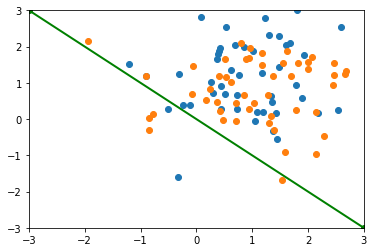

In [24]:
# Representamos la solucion

# Asignamos unos pesos
w = np.array([1,1,0], requires_grad = True)

def img_line(x,w):
    if w[1] == 0:
        w[1] = 0.0001
    return -(w[0] * x + w[2]) / w[1]

def plot_model(w):
    x1, x2 = -3, 3
    plt.plot([x1, x2], [img_line(x1,w), img_line(x2,w)], 'go-', label='line 1', linewidth = 2)
    plt.scatter(A[:,0], A[:,1])
    plt.scatter(B[:,0], B[:,1])
    plt.axis((-3,3,-3,3))
    
plot_model(w)

In [25]:
# Calculamos el error

def average_loss(w, data):
    losses = 0
    for x,y in data: 
        losses  += (model(x,w) - y) ** 2
    return losses/len(data)

In [26]:
average_loss([1,1,0], data)

tensor(1.49714186, requires_grad=True)

In [27]:
# Obtenemos la derivada para recalcular los pesos,
# para ello deriva la funcion 'average_loss' respecto del 'argnum = 0' es decir w.
gradient_fn_w = qml.grad(average_loss, argnum = 0)

epoch 100 loss 0.9792811536285463


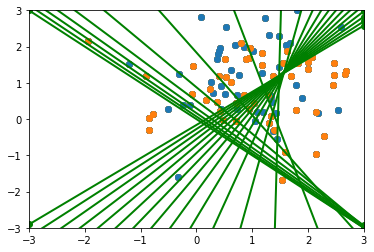

In [29]:
# Inicializamos el proceso de automatizacion

from IPython.display import clear_output
w = np.array([1,1,0], requires_grad = True)

# Learning rate
lr = 0.1

# Actiualizacion de pesos
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 5 == 0:
        clear_output(wait=True)
        print('epoch', epoch, 'loss', average_loss(w, data))
        plot_model(w)
        